# LOAD SAMPLE DATA (X,y)

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# PLOT DATA TO SEE DISTRIBUTION

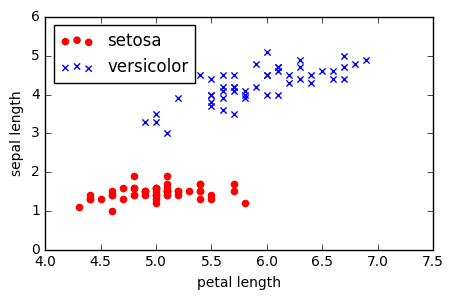

In [162]:
import matplotlib.pyplot as plt
import numpy as np

# to get 4rth column value for first 100 rows
y = df.iloc[0:100, 4].values
y = np.where(y== 'Iris-setosa', -1, 1)

# take sepal length & petal length columns (0th & 2nd)
X = df.iloc[0:100, [0,2]].values
plt.figure(figsize=(5, 3))
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[51:100, 0], X[51:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

# Perceptron classifier on given input (vs) normalized input
As we can see in the below plot, it converged quicker (in lesser epochs) with normalized input

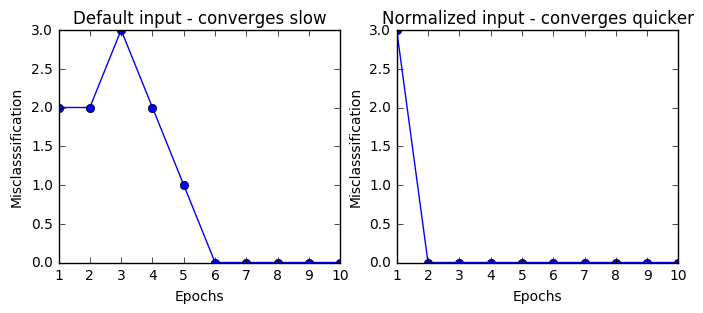

In [196]:
###########################################################################################
# PERCEPTRON OR GD (Gradient descent): Default VS Normalized X.
###########################################################################################

%run 'Perceptron.ipynb'
ppn = Perceptron(eta=0.01, n_iter=10)
ppn.fit(X,y)
#print (ppn_std.errors_)

# normalize input and apply perceptron
X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean())/X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean())/X_std[:,1].std()
ppn_std = Perceptron(eta=0.01, n_iter=10)
ppn_std.fit(X_std,y)
#print (ppn_std.errors_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o', color='blue')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Misclasssification')
ax[0].set_title('Default input - converges slow')

ax[1].plot(range(1, len(ppn_std.errors_)+1), ppn_std.errors_, marker='o', color='blue')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Misclasssification')
ax[1].set_title('Normalized input - converges quicker')
plt.show()


# Let's plot decision region that perceptron learnt

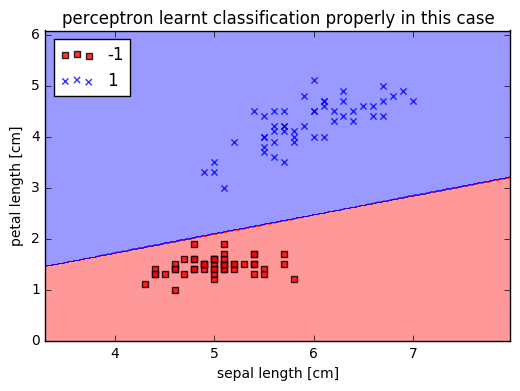

In [197]:
###########################################################################################
# PLOT DECISION REGION
###########################################################################################

%run 'plot_decision_regions.ipynb'
plot_decision_regions(X, y, classifier=ppn)
plt.title('perceptron learnt classification properly in this case')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()



# Let's try Adaline gradient descent a.k.a batch gradient descent on the same data

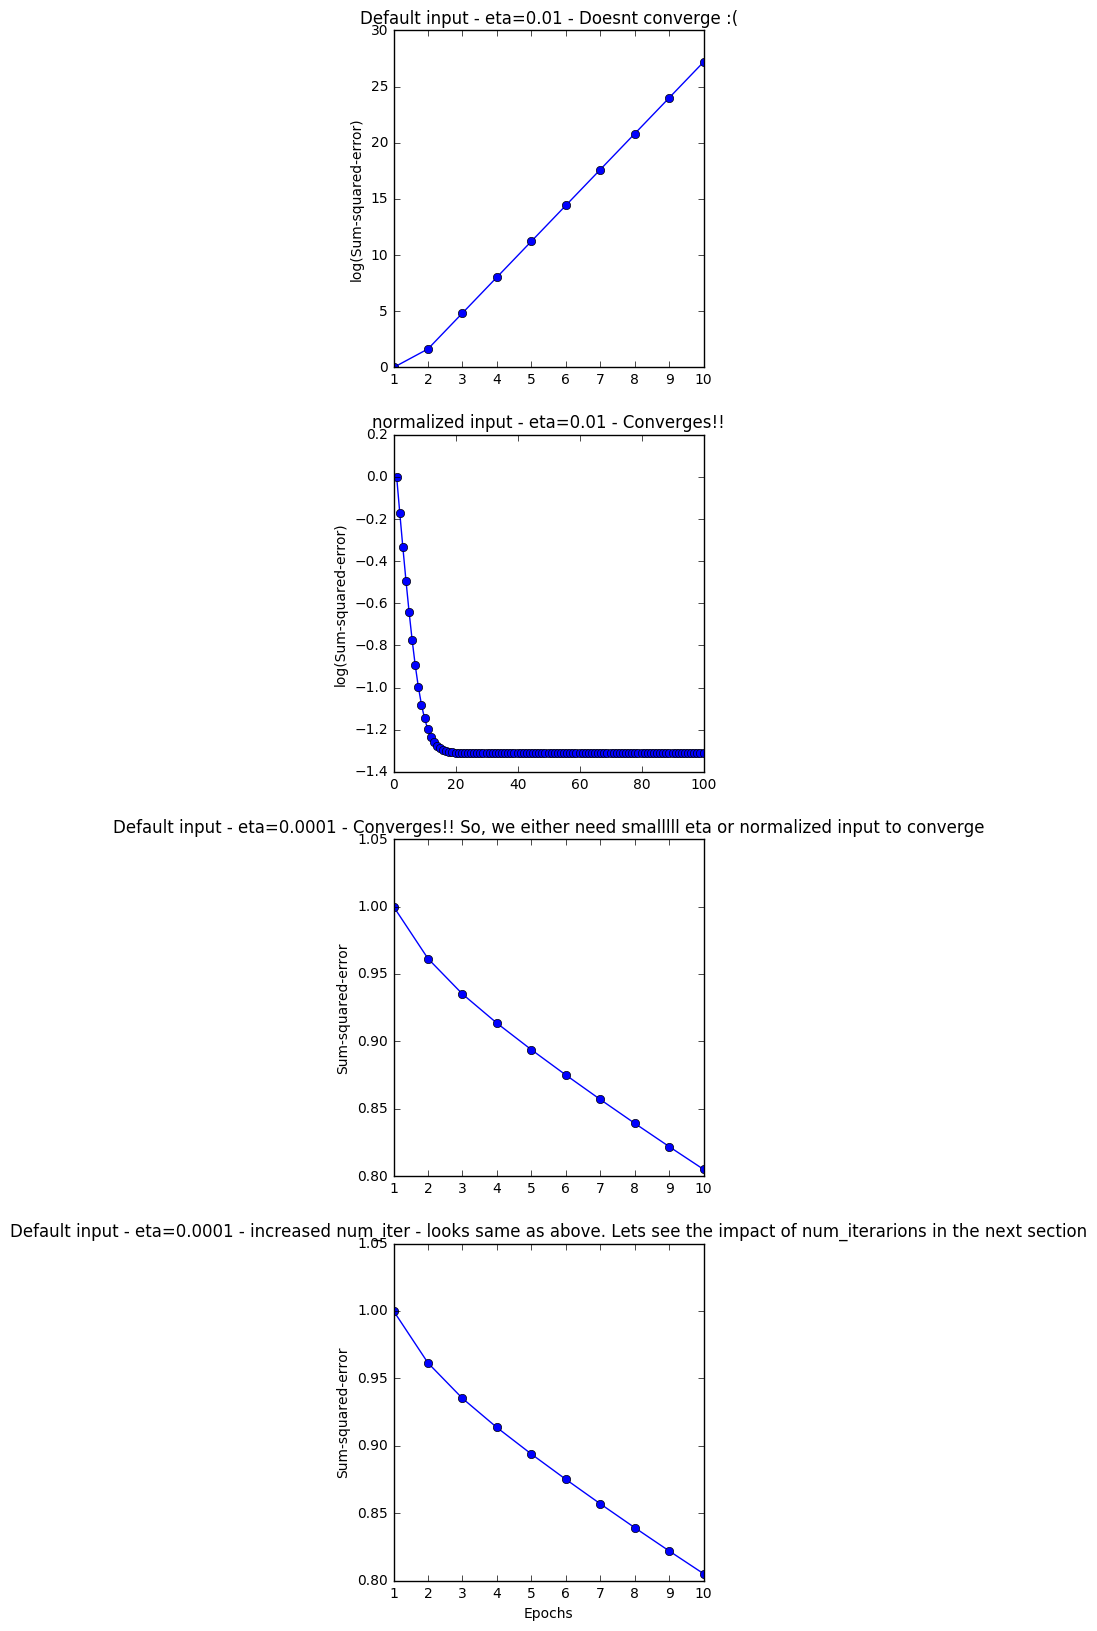

In [259]:
###########################################################################################
# ADALINE GD: Batch gradient descent. It doesnt converge at 0.01 learning rate.
###########################################################################################

%run 'AdalineGD.ipynb'
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(4, 20))

X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
#ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Default input - eta=0.01 - Doesnt converge :(')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[2].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
#ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Default input - eta=0.0001 - Converges!! So, we either need smalllll eta or normalized input to converge')

ada3 = AdalineGD(n_iter=100, eta=0.0001).fit(X, y)
ax[3].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Default input - eta=0.0001 - increased num_iter - looks same as above. Lets see the impact of num_iterarions in the next section')

ada_std = AdalineGD(n_iter=100, eta=0.01).fit(X_std, y)
#plt.figure(figsize=(3, 3))
ax[1].plot(range(1, len(ada_std.cost_) + 1), np.log10(ada_std.cost_), marker='o')
#ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('normalized input - eta=0.01 - Converges!!')
plt.show()


plt.show()

# Let's plot decision region's that AdalineGD learnt

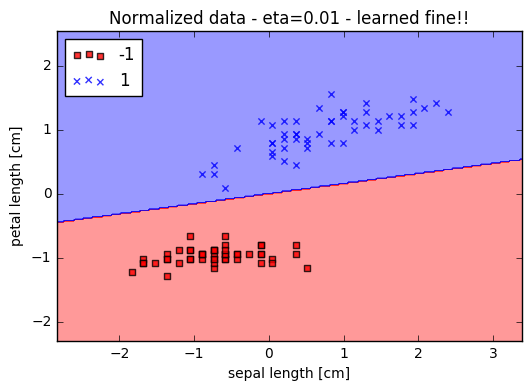

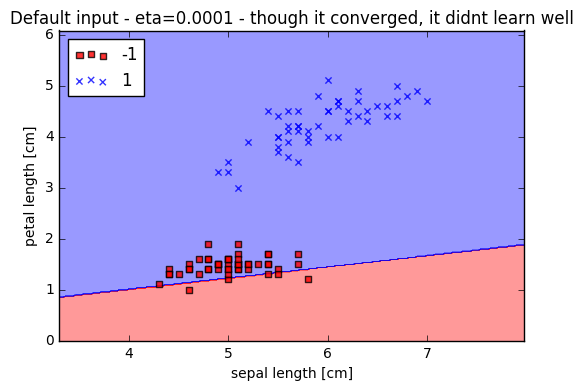

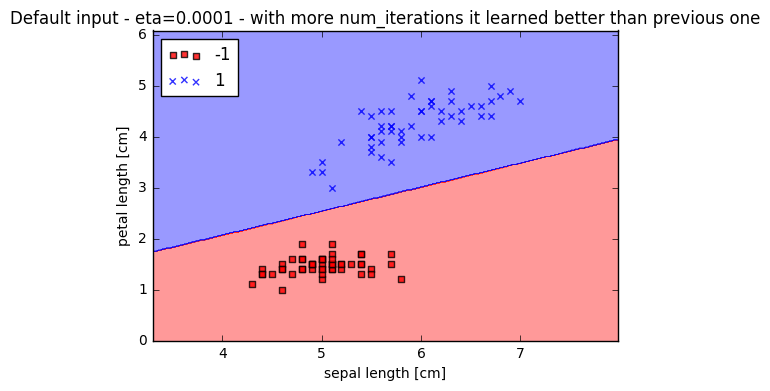

In [251]:
###########################################################################################
# ADALINE GD: normalize X and fit. Now it'll converge for eta=0.01. Also, decision boundary 
# is incorrect for AdalineGD with X. See below decision boundary plots with X (VS) X-std.
# Note that SSE remains non-zero even though all samples were classified correctly.
###########################################################################################

plot_decision_regions(X_std, y, classifier=ada_std)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.title('Normalized data - eta=0.01 - learned fine!!')
plt.show()

plot_decision_regions(X, y, classifier=ada2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Default input - eta=0.0001 - though it converged, it didnt learn well')
plt.legend(loc='upper left')
plt.show()

plot_decision_regions(X, y, classifier=ada3)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Default input - eta=0.0001 - with more num_iterations it learned better than previous one')
plt.legend(loc='upper left')
plt.show()